In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from IPython.display import display
from scipy.stats import linregress
import yfinance as yf 


# Feature extraction

## Import

In [2]:
df = pd.read_csv("outputs/df1.csv")
df_all = pd.read_csv("outputs/df_all1.csv")
df_train = pd.read_csv("outputs/df_train1.csv")
df_val = pd.read_csv("outputs/df_val1.csv")
df_test = pd.read_csv("outputs/df_test1.csv")

df['date'] = pd.to_datetime(df['date'],format='%Y-%m-%d %H:%M')
df_all['date'] = pd.to_datetime(df_all['date'],format='%Y-%m-%d %H:%M')
df_train['date'] = pd.to_datetime(df_train['date'],format='%Y-%m-%d %H:%M')
df_val['date'] = pd.to_datetime(df_val['date'],format='%Y-%m-%d %H:%M')
df_test['date'] = pd.to_datetime(df_test['date'],format='%Y-%m-%d %H:%M')


#display(type(df_all))
#display(df_all.dtypes)
#display(df_all)

#display(type(df_train))
#display(df_train.dtypes)
#display(df_train)

#display(type(df_val))
#display(df_val.dtypes)
#display(df_val)

#display(type(df_test))
#display(df_test.dtypes)
#display(df_test)

## DateTime features

In [3]:
df['Hour'] = df['date'].dt.hour 
df_all['Hour'] = df_all['date'].dt.hour 
df_train['Hour'] = df_train['date'].dt.hour 
df_val['Hour'] = df_val['date'].dt.hour 
df_test['Hour'] = df_test['date'].dt.hour 

df['weekdays'] = df['date'].dt.weekday 
df_all['weekdays'] = df_all['date'].dt.weekday 
df_train['weekdays'] = df_train['date'].dt.weekday 
df_val['weekdays'] = df_val['date'].dt.weekday 
df_test['weekdays'] = df_test['date'].dt.weekday 

df_all

,id,date,kwh,t_int,t,state,yday,quarter,month,day,weekdays,weekend,week,Hour
0,62,2017-01-10 00:00:00,224,18.726014,5.0,0,10,1,1,10,1,0,2,0
1,62,2017-01-10 00:30:00,112,18.701157,5.0,0,10,1,1,10,1,0,2,0
2,62,2017-01-10 01:00:00,112,18.648083,5.0,0,10,1,1,10,1,0,2,1
3,62,2017-01-10 01:30:00,112,18.603986,5.0,0,10,1,1,10,1,0,2,1
4,62,2017-01-10 02:00:00,112,18.581884,5.0,0,10,1,1,10,1,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146011,73,2018-05-31 22:00:00,112,17.472810,15.0,0,151,2,5,31,3,0,22,22
146012,73,2018-05-31 22:30:00,112,17.438647,15.0,0,151,2,5,31,3,0,22,22
146013,73,2018-05-31 23:00:00,112,17.383638,15.7,0,151,2,5,31,3,0,22,23
146014,73,2018-05-31 23:30:00,112,17.334394,15.7,0,151,2,5,31,3,0,22,23


In [4]:
from numpy import mean
from numpy import std
print('mean=%.3f stdv=%.3f' % (mean(df_all['kwh']), std(df_all['kwh'])))

mean=641.823 stdv=2747.613


In [5]:
# calculate summary statistics
data_mean, data_std = mean(df_all['kwh']), std(df_all['kwh'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

In [6]:
# identify outliers
outliers = [x for x in df_all['kwh'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

Identified outliers: 831


In [7]:
# remove outliers
outliers_removed = [x for x in df_all['kwh'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))

Non-outlier observations: 145185


In [8]:
#from scipy import stats
#df = df[(np.abs(stats.zscore(df['kwh'])) < 3)]
#df_all = df_all[(np.abs(stats.zscore(df_all['kwh'])) < 3)]
#df_train = df_train[(np.abs(stats.zscore(df_train['kwh'])) < 3)]
#df_test = df_test[(np.abs(stats.zscore(df_test['kwh'])) < 3)]
#df_val = df_val[(np.abs(stats.zscore(df_val['kwh'])) < 3)]
#df_all[(np.abs(stats.zscore(df_all['t'])) < 3)]

## Lag features

In [9]:
df['lag_1'] = df['kwh'].shift(1)
df['lag_2'] = df['kwh'].shift(2)
df['lag_3'] = df['kwh'].shift(3)
df['lag_4'] = df['kwh'].shift(4)
df['lag_5'] = df['kwh'].shift(5)
df = df[['id','date', 't', 't_int', 'yday', 'quarter', 'month', 'day', 'weekdays', 'weekend', 'week', 'Hour', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'kwh', 'state']]
display(df.head(10))

df_all['lag_1'] = df_all['kwh'].shift(1)
df_all['lag_2'] = df_all['kwh'].shift(2)
df_all['lag_3'] = df_all['kwh'].shift(3)
df_all['lag_4'] = df_all['kwh'].shift(4)
df_all['lag_5'] = df_all['kwh'].shift(5)
df_all = df_all[['id','date', 't', 't_int', 'yday', 'quarter', 'month', 'day', 'weekdays', 'weekend', 'week', 'Hour', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'kwh', 'state']]
display(df_all.head(10))

df_train['lag_1'] = df_train['kwh'].shift(1)
df_train['lag_2'] = df_train['kwh'].shift(2)
df_train['lag_3'] = df_train['kwh'].shift(3)
df_train['lag_4'] = df_train['kwh'].shift(4)
df_train['lag_5'] = df_train['kwh'].shift(5)
df_train = df_train[['id','date', 't', 't_int', 'yday', 'quarter', 'month', 'day', 'weekdays', 'weekend', 'week', 'Hour', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'kwh', 'state']]
display(df_train.head(10))

df_val['lag_1'] = df_val['kwh'].shift(1)
df_val['lag_2'] = df_val['kwh'].shift(2)
df_val['lag_3'] = df_val['kwh'].shift(3)
df_val['lag_4'] = df_val['kwh'].shift(4)
df_val['lag_5'] = df_val['kwh'].shift(5)
df_val = df_val[['id','date', 't', 't_int', 'yday', 'quarter', 'month', 'day', 'weekdays', 'weekend', 'week', 'Hour', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'kwh', 'state']]
display(df_val.head(10))

df_test['lag_1'] = df_test['kwh'].shift(1)
df_test['lag_2'] = df_test['kwh'].shift(2)
df_test['lag_3'] = df_test['kwh'].shift(3)
df_test['lag_4'] = df_test['kwh'].shift(4)
df_test['lag_5'] = df_test['kwh'].shift(5)
df_test = df_test[['id','date', 't', 't_int', 'yday', 'quarter', 'month', 'day', 'weekdays', 'weekend', 'week', 'Hour', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'kwh', 'state']]
display(df_test.head(10))

,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,kwh,state
0,62,2017-01-10 00:00:00,5.0,18.726014,10,1,1,10,1,0,2,0,NaN,NaN,NaN,NaN,NaN,224,0
1,62,2017-01-10 00:30:00,5.0,18.701157,10,1,1,10,1,0,2,0,224.0,NaN,NaN,NaN,NaN,112,0
2,62,2017-01-10 01:00:00,5.0,18.648083,10,1,1,10,1,0,2,1,112.0,224.0,NaN,NaN,NaN,112,0
3,62,2017-01-10 01:30:00,5.0,18.603986,10,1,1,10,1,0,2,1,112.0,112.0,224.0,NaN,NaN,112,0
4,62,2017-01-10 02:00:00,5.0,18.581884,10,1,1,10,1,0,2,2,112.0,112.0,112.0,224.0,NaN,112,0
5,62,2017-01-10 02:30:00,5.0,18.532024,10,1,1,10,1,0,2,2,112.0,112.0,112.0,112.0,224.0,112,0
6,62,2017-01-10 03:00:00,5.0,18.483444,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,112,0
7,62,2017-01-10 03:30:00,5.0,18.479167,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,224,0
8,62,2017-01-10 04:00:00,5.0,18.429791,10,1,1,10,1,0,2,4,224.0,112.0,112.0,112.0,112.0,112,0
9,62,2017-01-10 04:30:00,5.0,18.392803,10,1,1,10,1,0,2,4,112.0,224.0,112.0,112.0,112.0,112,0


,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,kwh,state
0,62,2017-01-10 00:00:00,5.0,18.726014,10,1,1,10,1,0,2,0,NaN,NaN,NaN,NaN,NaN,224,0
1,62,2017-01-10 00:30:00,5.0,18.701157,10,1,1,10,1,0,2,0,224.0,NaN,NaN,NaN,NaN,112,0
2,62,2017-01-10 01:00:00,5.0,18.648083,10,1,1,10,1,0,2,1,112.0,224.0,NaN,NaN,NaN,112,0
3,62,2017-01-10 01:30:00,5.0,18.603986,10,1,1,10,1,0,2,1,112.0,112.0,224.0,NaN,NaN,112,0
4,62,2017-01-10 02:00:00,5.0,18.581884,10,1,1,10,1,0,2,2,112.0,112.0,112.0,224.0,NaN,112,0
5,62,2017-01-10 02:30:00,5.0,18.532024,10,1,1,10,1,0,2,2,112.0,112.0,112.0,112.0,224.0,112,0
6,62,2017-01-10 03:00:00,5.0,18.483444,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,112,0
7,62,2017-01-10 03:30:00,5.0,18.479167,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,224,0
8,62,2017-01-10 04:00:00,5.0,18.429791,10,1,1,10,1,0,2,4,224.0,112.0,112.0,112.0,112.0,112,0
9,62,2017-01-10 04:30:00,5.0,18.392803,10,1,1,10,1,0,2,4,112.0,224.0,112.0,112.0,112.0,112,0


,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,kwh,state
0,62,2017-01-10 00:00:00,5.0,18.726014,10,1,1,10,1,0,2,0,NaN,NaN,NaN,NaN,NaN,224,0
1,62,2017-01-10 00:30:00,5.0,18.701157,10,1,1,10,1,0,2,0,224.0,NaN,NaN,NaN,NaN,112,0
2,62,2017-01-10 01:00:00,5.0,18.648083,10,1,1,10,1,0,2,1,112.0,224.0,NaN,NaN,NaN,112,0
3,62,2017-01-10 01:30:00,5.0,18.603986,10,1,1,10,1,0,2,1,112.0,112.0,224.0,NaN,NaN,112,0
4,62,2017-01-10 02:00:00,5.0,18.581884,10,1,1,10,1,0,2,2,112.0,112.0,112.0,224.0,NaN,112,0
5,62,2017-01-10 02:30:00,5.0,18.532024,10,1,1,10,1,0,2,2,112.0,112.0,112.0,112.0,224.0,112,0
6,62,2017-01-10 03:00:00,5.0,18.483444,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,112,0
7,62,2017-01-10 03:30:00,5.0,18.479167,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,224,0
8,62,2017-01-10 04:00:00,5.0,18.429791,10,1,1,10,1,0,2,4,224.0,112.0,112.0,112.0,112.0,112,0
9,62,2017-01-10 04:30:00,5.0,18.392803,10,1,1,10,1,0,2,4,112.0,224.0,112.0,112.0,112.0,112,0


,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,kwh,state
0,62,2018-01-01 00:00:00,3.4,18.392153,1,1,1,1,0,0,1,0,NaN,NaN,NaN,NaN,NaN,112,0
1,62,2018-01-01 00:30:00,3.4,18.383333,1,1,1,1,0,0,1,0,112.0,NaN,NaN,NaN,NaN,112,0
2,62,2018-01-01 01:00:00,3.4,18.383333,1,1,1,1,0,0,1,1,112.0,112.0,NaN,NaN,NaN,112,0
3,62,2018-01-01 01:30:00,3.4,18.383333,1,1,1,1,0,0,1,1,112.0,112.0,112.0,NaN,NaN,112,0
4,62,2018-01-01 02:00:00,3.4,18.383333,1,1,1,1,0,0,1,2,112.0,112.0,112.0,112.0,NaN,112,0
5,62,2018-01-01 02:30:00,3.4,18.770308,1,1,1,1,0,0,1,2,112.0,112.0,112.0,112.0,112.0,1680,1
6,62,2018-01-01 03:00:00,3.4,19.564625,1,1,1,1,0,0,1,3,1680.0,112.0,112.0,112.0,112.0,112,1
7,62,2018-01-01 03:30:00,3.4,19.600000,1,1,1,1,0,0,1,3,112.0,1680.0,112.0,112.0,112.0,112,0
8,62,2018-01-01 04:00:00,3.4,19.600000,1,1,1,1,0,0,1,4,112.0,112.0,1680.0,112.0,112.0,112,0
9,62,2018-01-01 04:30:00,3.4,19.600000,1,1,1,1,0,0,1,4,112.0,112.0,112.0,1680.0,112.0,112,0


,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,week,Hour,lag_1,lag_2,lag_3,lag_4,lag_5,kwh,state
0,63,2017-01-10 00:00:00,5.0,14.812222,10,1,1,10,1,0,2,0,NaN,NaN,NaN,NaN,NaN,112,0
1,63,2017-01-10 00:30:00,5.0,14.533193,10,1,1,10,1,0,2,0,112.0,NaN,NaN,NaN,NaN,112,0
2,63,2017-01-10 01:00:00,5.0,14.261271,10,1,1,10,1,0,2,1,112.0,112.0,NaN,NaN,NaN,112,0
3,63,2017-01-10 01:30:00,5.0,14.043876,10,1,1,10,1,0,2,1,112.0,112.0,112.0,NaN,NaN,112,0
4,63,2017-01-10 02:00:00,5.0,13.868082,10,1,1,10,1,0,2,2,112.0,112.0,112.0,112.0,NaN,112,0
5,63,2017-01-10 02:30:00,5.0,13.751615,10,1,1,10,1,0,2,2,112.0,112.0,112.0,112.0,112.0,112,0
6,63,2017-01-10 03:00:00,5.0,13.642856,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,112,0
7,63,2017-01-10 03:30:00,5.0,13.509843,10,1,1,10,1,0,2,3,112.0,112.0,112.0,112.0,112.0,112,0
8,63,2017-01-10 04:00:00,5.0,13.354058,10,1,1,10,1,0,2,4,112.0,112.0,112.0,112.0,112.0,112,0
9,63,2017-01-10 04:30:00,5.0,13.231559,10,1,1,10,1,0,2,4,112.0,112.0,112.0,112.0,112.0,112,0


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


df_all


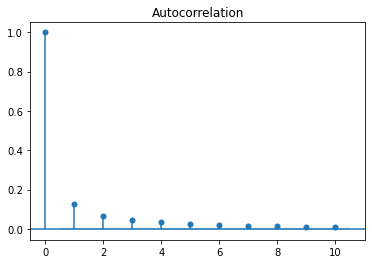

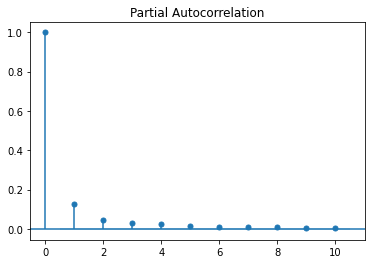

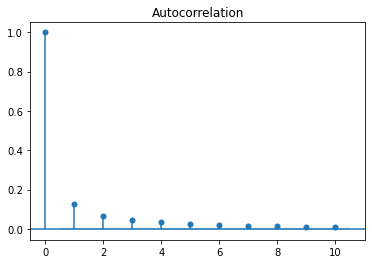

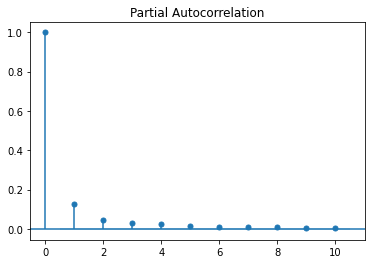

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

print("df_all")
display(plot_acf(df_all['kwh'], lags=10))
display(plot_pacf(df_all['kwh'], lags=10))

#print("df_train")
#display(plot_acf(df_train['kwh'], lags=10))
#plot_pacf(df_train['kwh'], lags=10)

#print("df_val")
#display(plot_acf(df_val['kwh'], lags=10))
#plot_pacf(df_val['kwh'], lags=10)

#print("df_test")
#display(plot_acf(df_test['kwh'], lags=10))
#display(plot_pacf(df_test['kwh'], lags=10))

## Rolling window

In [11]:
# I want to get the slope for the Close every 7 days 
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

In [12]:
df['rolling_mean'] = df['kwh'].rolling(window=6).mean()
df['rolling_median'] = df['kwh'].rolling(window=6).median()
df['rolling_skewness'] = df['kwh'].rolling(window=6).skew()
df['rolling_kurtosis'] = df['kwh'].rolling(window=6).kurt()
df['rolling_std'] = df['kwh'].rolling(window=6).std()
df['rolling_slope'] = df['kwh'].rolling(window=6).apply(get_slope, raw=True)

df_all['rolling_mean'] = df_all['kwh'].rolling(window=6).mean()
df_all['rolling_median'] = df_all['kwh'].rolling(window=6).median()
df_all['rolling_skewness'] = df_all['kwh'].rolling(window=6).skew()
df_all['rolling_kurtosis'] = df_all['kwh'].rolling(window=6).kurt()
df_all['rolling_std'] = df_all['kwh'].rolling(window=6).std()
df_all['rolling_slope'] = df_all['kwh'].rolling(window=6).apply(get_slope, raw=True)

df_train['rolling_mean'] = df_train['kwh'].rolling(window=6).mean()
df_train['rolling_median'] = df_train['kwh'].rolling(window=6).median()
df_train['rolling_skewness'] = df_train['kwh'].rolling(window=6).skew()
df_train['rolling_kurtosis'] = df_train['kwh'].rolling(window=6).kurt()
df_train['rolling_std'] = df_train['kwh'].rolling(window=6).std()
df_train['rolling_slope'] = df_train['kwh'].rolling(window=6).apply(get_slope, raw=True)

df_val['rolling_mean'] = df_val['kwh'].rolling(window=6).mean()
df_val['rolling_median'] = df_val['kwh'].rolling(window=6).median()
df_val['rolling_skewness'] = df_val['kwh'].rolling(window=6).skew()
df_val['rolling_kurtosis'] = df_val['kwh'].rolling(window=6).kurt()
df_val['rolling_std'] = df_val['kwh'].rolling(window=6).std()
df_val['rolling_slope'] = df_val['kwh'].rolling(window=6).apply(get_slope, raw=True)

df_test['rolling_mean'] = df_test['kwh'].rolling(window=6).mean()
df_test['rolling_median'] = df_test['kwh'].rolling(window=6).median()
df_test['rolling_skewness'] = df_test['kwh'].rolling(window=6).skew()
df_test['rolling_kurtosis'] = df_test['kwh'].rolling(window=6).kurt()
df_test['rolling_std'] = df_test['kwh'].rolling(window=6).std()
df_test['rolling_slope'] = df_test['kwh'].rolling(window=6).apply(get_slope, raw=True)

df_all.head(10)

C:\Users\zcfbu\AppData\Local\Temp/ipykernel_918320/4180866020.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['rolling_mean'] = df_all['kwh'].rolling(window=6).mean()
C:\Users\zcfbu\AppData\Local\Temp/ipykernel_918320/4180866020.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['rolling_median'] = df_all['kwh'].rolling(window=6).median()
C:\Users\zcfbu\AppData\Local\Temp/ipykernel_918320/4180866020.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

,id,date,t,t_int,yday,quarter,month,day,weekdays,weekend,...,lag_4,lag_5,kwh,state,rolling_mean,rolling_median,rolling_skewness,rolling_kurtosis,rolling_std,rolling_slope
0,62,2017-01-10 00:00:00,5.0,18.726014,10,1,1,10,1,0,...,NaN,NaN,224,0,NaN,NaN,NaN,NaN,NaN,NaN
1,62,2017-01-10 00:30:00,5.0,18.701157,10,1,1,10,1,0,...,NaN,NaN,112,0,NaN,NaN,NaN,NaN,NaN,NaN
2,62,2017-01-10 01:00:00,5.0,18.648083,10,1,1,10,1,0,...,NaN,NaN,112,0,NaN,NaN,NaN,NaN,NaN,NaN
3,62,2017-01-10 01:30:00,5.0,18.603986,10,1,1,10,1,0,...,NaN,NaN,112,0,NaN,NaN,NaN,NaN,NaN,NaN
4,62,2017-01-10 02:00:00,5.0,18.581884,10,1,1,10,1,0,...,224.0,NaN,112,0,NaN,NaN,NaN,NaN,NaN,NaN
5,62,2017-01-10 02:30:00,5.0,18.532024,10,1,1,10,1,0,...,112.0,224.0,112,0,130.666667,112.0,2.44949,6.0,45.723809,-16.0
6,62,2017-01-10 03:00:00,5.0,18.483444,10,1,1,10,1,0,...,112.0,112.0,112,0,112.000000,112.0,NaN,NaN,0.000001,0.0
7,62,2017-01-10 03:30:00,5.0,18.479167,10,1,1,10,1,0,...,112.0,112.0,224,0,130.666667,112.0,2.44949,6.0,45.723809,16.0
8,62,2017-01-10 04:00:00,5.0,18.429791,10,1,1,10,1,0,...,112.0,112.0,112,0,130.666667,112.0,2.44949,6.0,45.723809,9.6
9,62,2017-01-10 04:30:00,5.0,18.392803,10,1,1,10,1,0,...,112.0,112.0,112,0,130.666667,112.0,2.44949,6.0,45.723809,3.2


- ADD HISTOGRAMS SHOWING HOW MUCH HEATING IS ON AT DIFFERENT POINTS (WEEKDAYS/WEEKENDS/WEEKS/HOURS)!!!
- LAGGED AUTOCORRELATION AND PARTIAL CORRELATION PLOTS ARE USEFUL
- COMPARE AVERAGE AND MEDIAN CONSUMPTIONS IN DIFFERENT YEARS/MONTH ETC.

In [13]:
#from statsmodels.graphics.tsaplots import plot_acf
#from matplotlib import pyplot
#plot_acf(df_train['kwh'])
#plot_pacf(df_train['kwh'])
#pyplot.show()

#display(plot_acf(df_test['kwh'], lags=10))
#display(plot_pacf(df_test['kwh'], lags=10))

In [14]:
#print 'Unique values of month:',
df_all.weekdays.unique()

array([1, 2, 3, 4, 5, 6, 0], dtype=int64)

In [15]:
# cyclical variables
#df_all['yday_sin'] = np.sin((df_all.yday-1)*(2.*np.pi/365))
#df_all['yday_cos'] = np.cos((df_all.yday-1)*(2.*np.pi/365))
#df_all['week_sin'] = np.sin((df_all.week-1)*(2.*np.pi/52))
#df_all['week_cos'] = np.cos((df_all.week-1)*(2.*np.pi/52))
#df_all['day_sin'] = np.sin((df_all.day-1)*(2.*np.pi/31))
#df_all['day_cos'] = np.cos((df_all.day-1)*(2.*np.pi/31))
#df_all['hr_sin'] = np.sin(df_all.Hour*(2.*np.pi/24))
#df_all['hr_cos'] = np.cos(df_all.Hour*(2.*np.pi/24))
#df_all['mnth_sin'] = np.sin((df_all.month-1)*(2.*np.pi/12))
#df_all['mnth_cos'] = np.cos((df_all.month-1)*(2.*np.pi/12))
#df_all['wd_sin'] = np.sin(df_all.weekdays*(2.*np.pi/7))
#df_all['wd_cos'] = np.cos(df_all.weekdays*(2.*np.pi/7))

#df_train['yday_sin'] = np.sin((df_train.yday-1)*(2.*np.pi/365))
#df_train['yday_cos'] = np.cos((df_train.yday-1)*(2.*np.pi/365))
#df_train['week_sin'] = np.sin((df_train.week-1)*(2.*np.pi/52))
#df_train['week_cos'] = np.cos((df_train.week-1)*(2.*np.pi/52))
#df_train['day_sin'] = np.sin((df_train.day-1)*(2.*np.pi/31))
#df_train['day_cos'] = np.cos((df_train.day-1)*(2.*np.pi/31))
#df_train['hr_sin'] = np.sin(df_train.Hour*(2.*np.pi/24))
#df_train['hr_cos'] = np.cos(df_train.Hour*(2.*np.pi/24))
#df_train['mnth_sin'] = np.sin((df_train.month-1)*(2.*np.pi/12))
#df_train['mnth_cos'] = np.cos((df_train.month-1)*(2.*np.pi/12))
#df_train['wd_sin'] = np.sin(df_train.weekdays*(2.*np.pi/7))
#df_train['wd_cos'] = np.cos(df_train.weekdays*(2.*np.pi/7))

#df_val['yday_sin'] = np.sin((df_val.yday-1)*(2.*np.pi/365))
#df_val['yday_cos'] = np.cos((df_val.yday-1)*(2.*np.pi/365))
#df_val['week_sin'] = np.sin((df_val.week-1)*(2.*np.pi/52))
#df_val['week_cos'] = np.cos((df_val.week-1)*(2.*np.pi/52))
#df_val['day_sin'] = np.sin((df_val.day-1)*(2.*np.pi/31))
#df_val['day_cos'] = np.cos((df_val.day-1)*(2.*np.pi/31))
#df_val['hr_sin'] = np.sin(df_val.Hour*(2.*np.pi/24))
#df_val['hr_cos'] = np.cos(df_val.Hour*(2.*np.pi/24))
#df_val['mnth_sin'] = np.sin((df_val.month-1)*(2.*np.pi/12))
#df_val['mnth_cos'] = np.cos((df_val.month-1)*(2.*np.pi/12))
#df_val['wd_sin'] = np.sin(df_val.weekdays*(2.*np.pi/7))
#df_val['wd_cos'] = np.cos(df_val.weekdays*(2.*np.pi/7))

#df_test['yday_sin'] = np.sin((df_test.yday-1)*(2.*np.pi/365))
#df_test['yday_cos'] = np.cos((df_test.yday-1)*(2.*np.pi/365))
#df_test['week_sin'] = np.sin((df_test.week-1)*(2.*np.pi/52))
#df_test['week_cos'] = np.cos((df_test.week-1)*(2.*np.pi/52))
#df_test['day_sin'] = np.sin((df_test.day-1)*(2.*np.pi/31))
#df_test['day_cos'] = np.cos((df_test.day-1)*(2.*np.pi/31))
#df_test['hr_sin'] = np.sin(df_test.Hour*(2.*np.pi/24))
#df_test['hr_cos'] = np.cos(df_test.Hour*(2.*np.pi/24))
#df_test['mnth_sin'] = np.sin((df_test.month-1)*(2.*np.pi/12))
#df_test['mnth_cos'] = np.cos((df_test.month-1)*(2.*np.pi/12))
#df_test['wd_sin'] = np.sin(df_test.weekdays*(2.*np.pi/7))
#df_test['wd_cos'] = np.cos(df_test.weekdays*(2.*np.pi/7))

In [16]:
df.to_csv("outputs/df2.csv")
df_all.to_csv("outputs/df_all2.csv")
df_train.to_csv("outputs/df_train2.csv")
df_val.to_csv("outputs/df_val2.csv")
df_test.to_csv("outputs/df_test2.csv")

<Figure size 432x432 with 0 Axes>

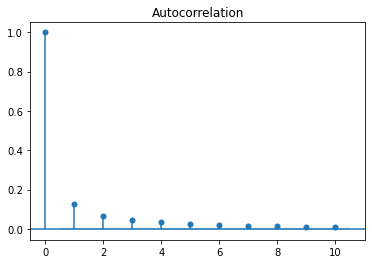

In [17]:
from pylab import figure, axes, pie, title, show
figure(2, figsize=(6,6))
plot_acf(df_all['kwh'], lags=10)
#plot_pacf(df_all['kwh'], lags=10)
plt.savefig('foo.png')